# Problem Statement

Predicting whether a customer will do a specific transaction in future.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.ticker as ticker

#Classifier Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#For Principal Component Analysis- (Dimensionality Reduction)
from sklearn.decomposition import PCA

#For train test split
from sklearn.model_selection import train_test_split

#For Confusion Matrix
from sklearn.metrics import confusion_matrix

#For Classification Report
from sklearn.metrics import classification_report

#Accuracy Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

### Importing the Dataset

In [2]:
my_train = pd.read_csv('train.csv')
#my_test = pd.read_csv('test.csv')

### Describing the Dataset

In [3]:
#train = train.iloc[0:80000,:]
my_train.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [4]:
print(my_train.shape) #training set
#print(my_test.shape)  #testing set

(200000, 202)


In [5]:
my_train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

### Checking Target Class Balance

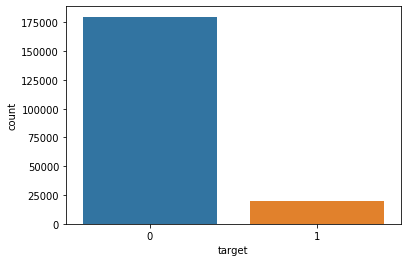

In [6]:
sns.countplot(my_train['target'])

In [7]:
#function to check target class balance
def check_target_class(df):
    a = sum(df['target']==0)
    print("No of rows with target variable = 0 ,are: ",+a)
    b = sum(df['target']==1)
    print("No of rows with target variable = 1 ,are: ",b)
    #total no of rows 
    tot1 = a+b
    print("Total no. of rows: ",+tot1)
    
    return tot1

In [8]:
tot1 = check_target_class(my_train)

No of rows with target variable = 0 ,are:  179902
No of rows with target variable = 1 ,are:  20098
Total no. of rows:  200000


## Data Preprocessing

### Missing Value Analysis

In [9]:
def calculate_missingValues(df):
    missing_val = pd.DataFrame(df.isnull().sum())                               #storing no of missing values in each column
    missing_val = missing_val.reset_index()                                     #resetting index
    missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})   #renaming columns
    missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(my_train))*100     #calculating missing value %ge
    
    #Missing Value Visualization----------------------------
    plt.figure(figsize=(6,4))
    ax = plt.axes()

    ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))

    plt.ylabel('Amount of Missing Values')
    plt.xlabel('Column Names')
    plt.title('Missing Value Analysis')
    plt.plot(missing_val.Variables,missing_val.Missing_percentage )
    plt.show()
    #plt.savefig('Missing_Values.jpg')
    
    #-------------------------------------------------------
    return missing_val

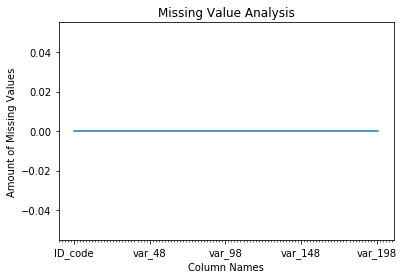

Variables  Missing_percentage
0     ID_code                 0.0
1      target                 0.0
2       var_0                 0.0
3       var_1                 0.0
4       var_2                 0.0
..        ...                 ...
197   var_195                 0.0
198   var_196                 0.0
199   var_197                 0.0
200   var_198                 0.0
201   var_199                 0.0

[202 rows x 2 columns]

In [10]:
missing_val_df = calculate_missingValues(my_train)
missing_val_df.to_csv("Miising_perc.csv", index = False)
missing_val_df

**Observation:**
No Missing Values were found

### Outlier Analysis

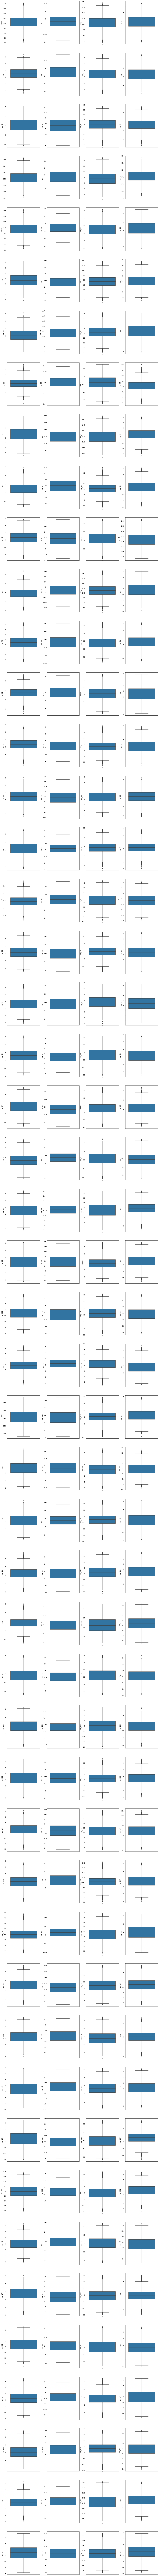

In [25]:
fig, axes = plt.subplots(nrows=50, ncols=4,figsize = (20,350))
for i,column in enumerate(my_train.columns[2:202]):
    sns.boxplot(y = my_train[column],ax = axes[i//4,i%4])

**Observation:** In every variable we can see some outliers. 
So we'll check the percentage of data that is having outliers, and if its less than 30% we may remove them. 

In [11]:
#creating a copy of training set
df_cleaned = my_train.copy()

In [12]:
#extracting numeric column names
cnames = df_cleaned.columns[2:202]
cnames

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

**Dropping Rows having Outliers**

In [13]:
#Function to remove rows having outliers
def remove_outliers(df):
    for i in cnames:
        print(i)
        q75,q25 = np.percentile(df.loc[:,i],[75,25])
        #inter quartile range
        iqr = q75 - q25
    
        min = q25 - (iqr*1.5)
        max = q75 + (iqr*1.5)
        print("Min value: ",+min)
        print("Max value: ",+max)
        print("\n")
    
        df = df.drop(df[df.loc[:,i]< min].index)
        df = df.drop(df[df.loc[:,i] > max].index)
    return df

In [14]:
df_cleaned = remove_outliers(my_train)

var_0
Min value:  1.9973250000000018
Max value:  19.214725


var_1
Min value:  -13.888612499999997
Max value:  10.507087499999999


var_2
Min value:  3.031512499999998
Max value:  18.207612500000003


var_3
Min value:  0.6484500000000004
Max value:  12.929649999999999


var_4
Min value:  6.3163750000000025
Max value:  15.827774999999997


var_5
Min value:  -29.38955
Max value:  19.11405


var_6
Min value:  2.9145000000000008
Max value:  7.856099999999998


var_7
Min value:  6.206024999999997
Max value:  26.839825000000005


var_8
Min value:  -10.2005625
Max value:  10.8209375


var_9
Min value:  3.6705499999999995
Max value:  11.53255


var_10
Min value:  -15.5628
Max value:  16.3516


var_11
Min value:  -20.0544
Max value:  13.399200000000002


var_12
Min value:  13.488700000000001
Max value:  14.569499999999998


var_13
Min value:  -5.730549999999998
Max value:  23.077849999999998


var_14
Min value:  0.5459000000000014
Max value:  14.504299999999999


var_15
Min value:  13.345000000

var_132
Min value:  3.44175
Max value:  12.194949999999999


var_133
Min value:  5.751249999999999
Max value:  7.86205


var_134
Min value:  -23.8119
Max value:  14.0017


var_135
Min value:  -26.5782125
Max value:  17.770287500000002


var_136
Min value:  -9.258087499999997
Max value:  55.21601249999999


var_137
Min value:  -9.993199999999998
Max value:  45.0746


var_138
Min value:  -11.620200000000002
Max value:  13.988400000000002


var_139
Min value:  -13.864050000000002
Max value:  29.49395


var_140
Min value:  -10.914175
Max value:  17.864425


var_141
Min value:  -17.653550000000003
Max value:  23.691850000000002


var_142
Min value:  -4.384649999999995
Max value:  28.345749999999995


var_143
Min value:  4.087949999999998
Max value:  20.693150000000003


var_144
Min value:  5.944387500000003
Max value:  11.335087499999995


var_145
Min value:  -6.798275
Max value:  16.358725


var_146
Min value:  3.448900000000001
Max value:  17.3121


var_147
Min value:  -24.90945
Max value

**Checking count of Target Variable after Outlier Removal**

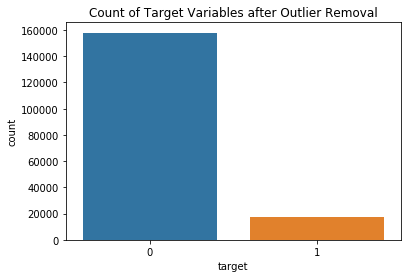

In [16]:
sns.countplot(df_cleaned['target']).set_title('Count of Target Variables after Outlier Removal')
plt.savefig('Countplot_after_outlier_removal.jpg')

In [17]:
tot2 = check_target_class(df_cleaned)

No of rows with target variable = 0 ,are:  157970
No of rows with target variable = 1 ,are:  17103
Total no. of rows:  175073


In [18]:
#Checking what percentage of data is removed during outlier analysis
perc = ((tot1-tot2)/tot1)*100
print("Percentage Removal: ",+perc)

Percentage Removal:  12.4635


**Observation:** Since only 12% of data is having outliers i.e, less than 30% we can consider removing the outliers.

### Feature Scaling

In [19]:
df_cleaned.describe()

target          var_0          var_1          var_2  \
count  175073.000000  175073.000000  175073.000000  175073.000000   
mean        0.097691      10.680201      -1.635942      10.711507   
std         0.296897       3.031999       4.048808       2.635507   
min         0.000000       2.004400     -13.867400       3.035500   
25%         0.000000       8.455600      -4.751700       8.721800   
50%         0.000000      10.529600      -1.616700      10.576800   
75%         0.000000      12.757100       1.345600      12.510400   
max         1.000000      19.213500      10.376800      18.206700   

               var_3          var_4          var_5          var_6  \
count  175073.000000  175073.000000  175073.000000  175073.000000   
mean        6.795677      11.078524      -5.071101       5.407802   
std         2.042796       1.620351       7.867062       0.864390   
min         0.673200       6.318300     -29.188300       2.917000   
25%         5.250900       9.883200     -11.210100       4.767700   
50%         6.823000      11.106500      -4.852000       5.383700   
75%         8.324500      12.259300       0.925800       6.001700   
max        12.924900      15.807100      17.251600       7.854100   

               var_7          var_8  ...        var_190        var_191  \
count  175073.000000  175073.000000  ...  175073.000000  175073.000000   
mean       16.545620       0.289605  ...       3.238189       7.427826   
std         3.417344       3.331695  ...       4.539034       3.015767   
min         6.465300      -9.991100  ...      -9.748700      -1.358800   
25%        13.939200      -2.310500  ...      -0.051700       5.152300   
50%        16.454600       0.405300  ...       3.208600       7.334600   
75%        19.107400       2.939800  ...       6.394400       9.501500   
max        26.760200      10.151300  ...      16.079700      16.029500   

             var_192        var_193        var_194        var_195  \
count  175073.000000  175073.000000  175073.000000  175073.000000   
mean        1.924028       3.343734      17.993673      -0.141449   
std         1.455468       3.952981       3.134064       1.425334   
min        -2.192300      -7.833600       8.694400      -4.168600   
25%         0.892000       0.602300      15.628700      -1.169400   
50%         1.900700       3.395400      17.960800      -0.173800   
75%         2.943100       6.201500      20.396400       0.830400   
max         6.039500      14.619800      27.528400       3.811800   

             var_196        var_197        var_198        var_199  
count  175073.000000  175073.000000  175073.000000  175073.000000  
mean        2.297313       8.908086      15.876076      -3.326583  
std         5.453998       0.921239       3.003489      10.425672  
min       -14.209600       6.245200       7.484500     -35.174900  
25%        -1.952300       8.252800      13.837500     -11.203300  
50%         2.403000       8.889300      15.942500      -2.835600  
75%         6.549800       9.593300      18.070700       4.821900  
max        18.321500      11.600100      24.413900      28.500700  

[8 rows x 201 columns]

In [20]:
df_temp = df_cleaned.copy()

In [21]:
#Function to standardize data
def standardize_data(df):
    for i in cnames:
        print(i)
        df[i] = (df[i] - df[i].mean())/df[i].std()
    return df

In [22]:
df_cleaned = standardize_data(df_cleaned)

var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_10
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136
var_137
var_13

In [23]:
df_cleaned.describe()

target         var_0         var_1         var_2         var_3  \
count  175073.000000  1.750730e+05  1.750730e+05  1.750730e+05  1.750730e+05   
mean        0.097691 -8.168176e-14 -1.582155e-15 -8.185415e-15 -8.232897e-15   
std         0.296897  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min         0.000000 -2.861413e+00 -3.021002e+00 -2.912535e+00 -2.997106e+00   
25%         0.000000 -7.337079e-01 -7.695495e-01 -7.549617e-01 -7.562071e-01   
50%         0.000000 -4.967068e-02  4.752408e-03 -5.111243e-02  1.337537e-02   
75%         0.000000  6.849932e-01  7.363998e-01  6.825603e-01  7.483973e-01   
max         1.000000  2.814414e+00  2.966982e+00  2.843928e+00  3.000409e+00   

              var_4         var_5         var_6         var_7         var_8  \
count  1.750730e+05  1.750730e+05  1.750730e+05  1.750730e+05  1.750730e+05   
mean  -2.498801e-14 -5.532915e-16  1.425031e-14 -1.078399e-13  1.117257e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.937773e+00 -3.065591e+00 -2.881573e+00 -2.949753e+00 -3.085728e+00   
25%   -7.376945e-01 -7.803419e-01 -7.405248e-01 -7.627033e-01 -7.804151e-01   
50%    1.726536e-02  2.785047e-02 -2.788347e-02 -2.663459e-02  3.472570e-02   
75%    7.287161e-01  7.622796e-01  6.870717e-01  7.496408e-01  7.954497e-01   
max    2.918242e+00  2.837489e+00  2.830086e+00  2.989041e+00  2.959964e+00   

       ...       var_190       var_191       var_192       var_193  \
count  ...  1.750730e+05  1.750730e+05  1.750730e+05  1.750730e+05   
mean   ...  1.198490e-14 -3.470042e-14 -1.441214e-14  2.312971e-15   
std    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    ... -2.861157e+00 -2.913563e+00 -2.828181e+00 -2.827571e+00   
25%    ... -7.247993e-01 -7.545431e-01 -7.090695e-01 -6.935104e-01   
50%    ... -6.518772e-03 -3.091279e-02 -1.602798e-02  1.307025e-02   
75%    ...  6.953486e-01  6.876110e-01  7.001676e-01  7.229395e-01   
max    ...  2.829129e+00  2.852235e+00  2.827593e+00  2.852547e+00   

            var_194       var_195       var_196       var_197       var_198  \
count  1.750730e+05  1.750730e+05  1.750730e+05  1.750730e+05  1.750730e+05   
mean  -1.444315e-14  3.628379e-15 -6.317802e-15 -7.827308e-14 -9.573430e-14   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.967161e+00 -2.825409e+00 -3.026571e+00 -2.890549e+00 -2.793942e+00   
25%   -7.546026e-01 -7.211999e-01 -7.791740e-01 -7.113099e-01 -6.787358e-01   
50%   -1.048889e-02 -2.269679e-02  1.937786e-02 -2.039243e-02  2.211576e-02   
75%    7.666491e-01  6.818400e-01  7.797009e-01  7.437959e-01  7.306916e-01   
max    3.042289e+00  2.773561e+00  2.938063e+00  2.922167e+00  2.842635e+00   

            var_199  
count  1.750730e+05  
mean  -2.199726e-15  
std    1.000000e+00  
min   -3.054798e+00  
25%   -7.555117e-01  
50%    4.709370e-02  
75%    7.815788e-01  
max    3.052780e+00  

[8 rows x 201 columns]

## Exploratory Data Analysis

### Correlation Analysis

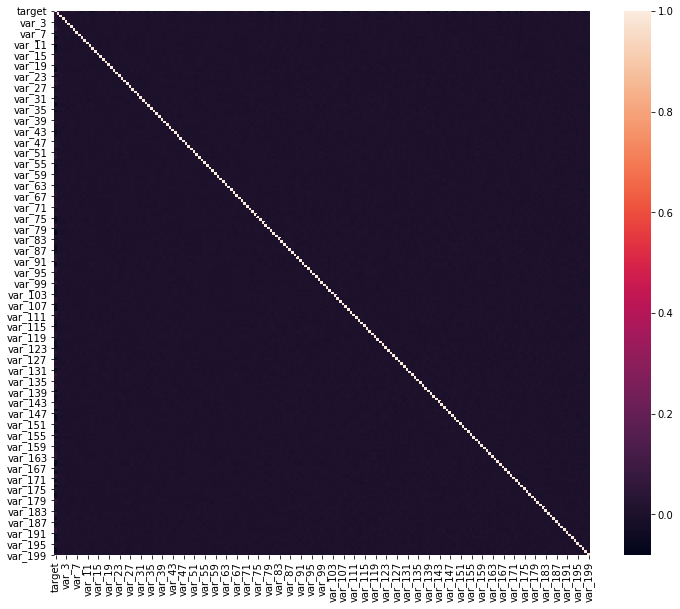

In [24]:
train_corr = df_cleaned.corr()
plt.figure(figsize=(12,10))
sns.heatmap(train_corr)
plt.savefig("correlogram2")

**Observation :**
The features are independent and are not correlated to each other

### Checking no. of Unique values in each column

In [25]:
unique_df = pd.DataFrame(df_cleaned.nunique())
unique_df['ID_code'] = unique_df.index
unique_df.columns = ['count','ID_code']
unique_df = unique_df.iloc[2:202,:]
unique_df = unique_df.sort_values('count', ascending = False).reset_index(drop = True)

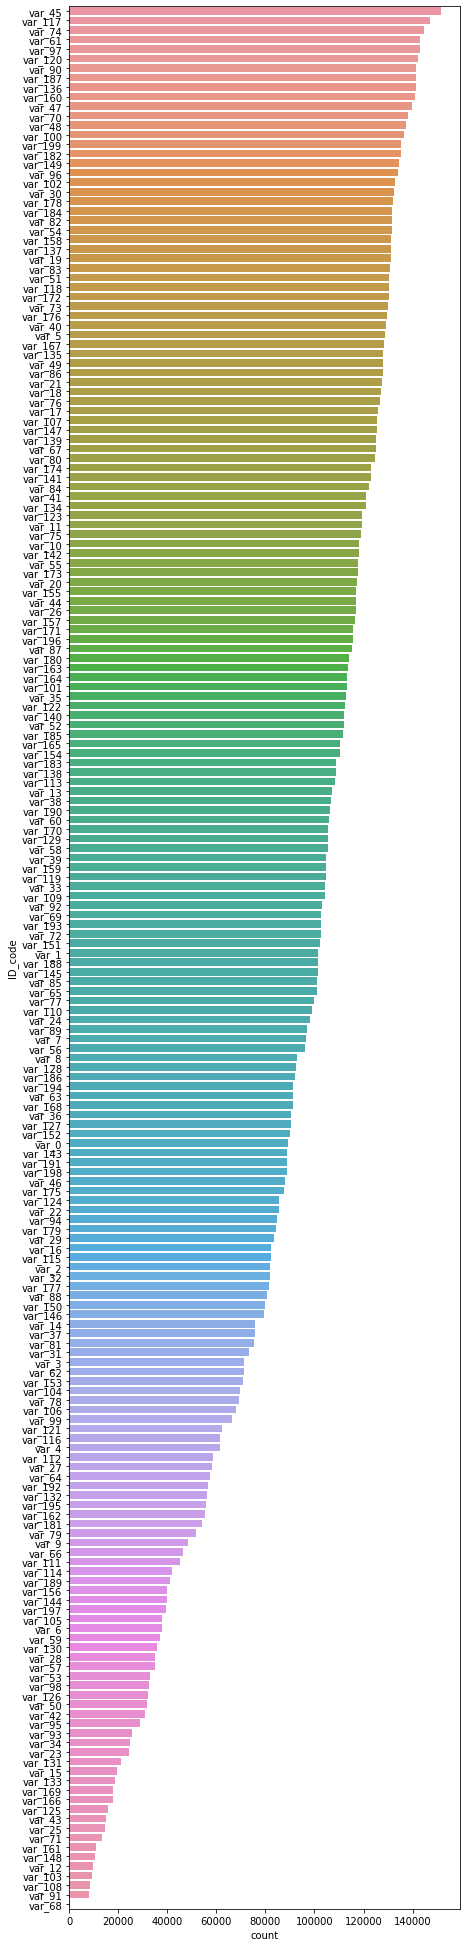

In [26]:
plt.figure(figsize=(7,35))
sns.barplot(y = unique_df['ID_code'], x = unique_df['count'])

In [27]:
unique_df[unique_df['count']<10000]

count  ID_code
195   9457   var_12
196   9236  var_103
197   8477  var_108
198   7867   var_91
199    401   var_68

**Observation:** var_68, var_91, var_108 , var_103 and var_12 are having very less unique values. It is possible that they are categorical and we may handle them accordingly.

<function matplotlib.pyplot.show(*args, **kw)>

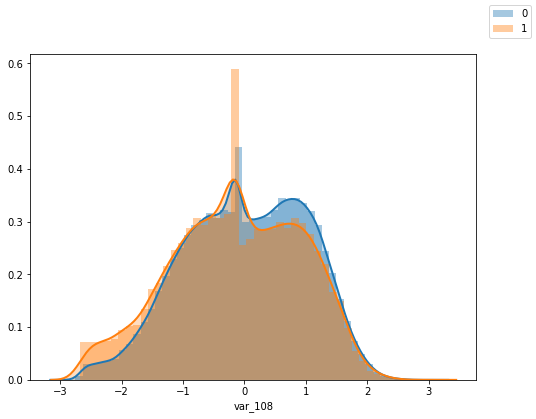

In [72]:
fig = plt.figure(figsize=(8,6))
sns.distplot(df_cleaned['var_108'].loc[df_cleaned['target'] == 0],label = '0',kde_kws = {'shade': True, 'linewidth': 2})
sns.distplot(df_cleaned['var_108'].loc[df_cleaned['target'] == 1],label = '1',kde_kws = {'shade': True, 'linewidth': 2})
fig.legend(labels=['0','1'])
plt.show

### Checking Distribution of Feature Variables

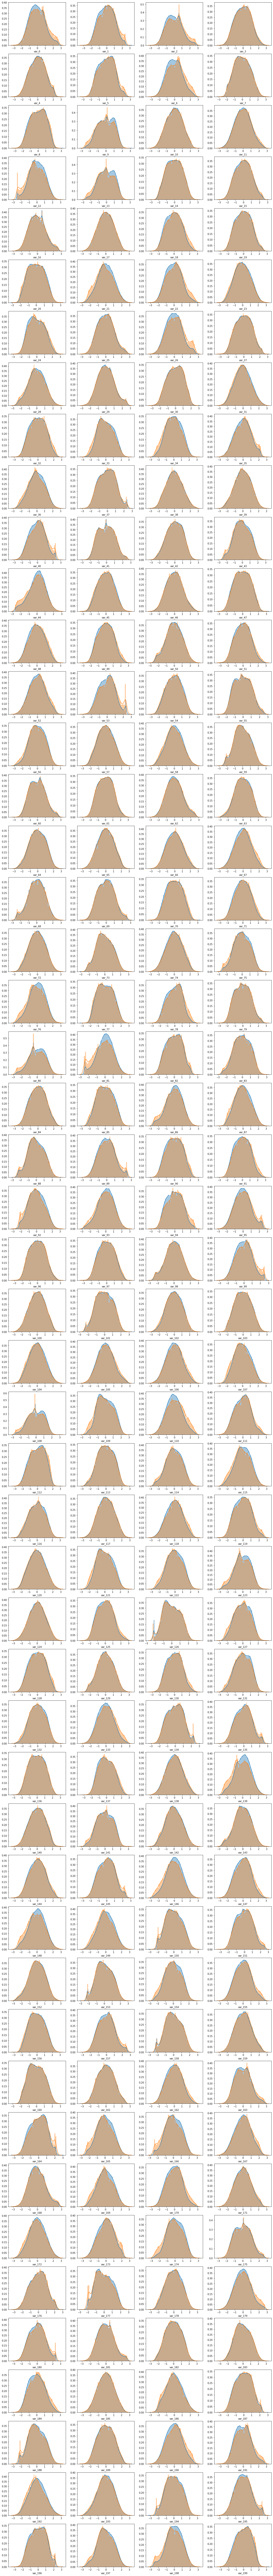

In [73]:
fig, axes = plt.subplots(nrows=50, ncols=4,figsize = (20,200))
for i,column in enumerate(df_cleaned.columns[2:202]):
    sns.distplot(df_cleaned[column].loc[df_cleaned['target'] == 0],ax = axes[i//4,i%4])
    sns.distplot(df_cleaned[column].loc[df_cleaned['target'] == 1],ax = axes[i//4,i%4])


### Principal Component Analysis

In [29]:
#seperating feature variables and target variables
df_x = df_cleaned.iloc[:,2:202] 
y = df_cleaned['target']

In [76]:
pca = PCA(n_components = 150 , whiten = 'True')
x = pca.fit(df_cleaned.iloc[:,2:202]).transform(df_cleaned.iloc[:,2:202])

Text(0, 0.5, 'Proportion of variance explained by additional feature')

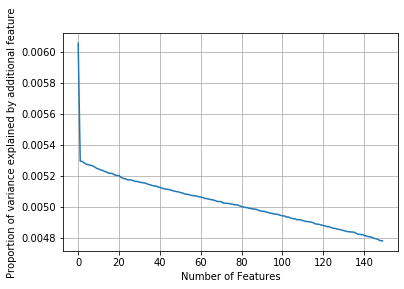

In [79]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Number of Features")
plt.grid(True)
plt.ylabel("Proportion of variance explained by additional feature")

In [22]:
x = pd.DataFrame(x) #new feature variables

**Observation:** Since the feature variables are independent of each other we can't apply PCA

# Model Development

**Making Train & Test Split**

In [30]:
x_train , x_test , y_train , y_test = train_test_split(df_cleaned.iloc[:,2:203],y,
                                                       test_size = 0.2 , 
                                                       random_state = 2020)

**Function for Classification Results**

In [31]:
def classification_results(pred):
    print("------Confusion Matrix----------")
    cm1 = confusion_matrix(y_test,pred)
    print(cm1)
    
    #Visualization of Confusion Matrix
    sns.heatmap(cm1,cmap="Blues",fmt="d",linewidths=0.1,linecolor='black',
            annot=True).set_title('Confusion Matrix')
    plt.xlabel('Predicted Class')
    plt.ylabel('Real Class')
    
    print("\n")
    #Classification Matrix Reports
    TP = cm1[1,1]
    print("True Positive: ",+TP)
    TN = cm1[0,0]
    print("True Negative: ",+TN)
    FP = cm1[0,1]
    print("False Positive: ",+FP)
    FN = cm1[1,0]
    print("False Negative: ",+FN)
    print("\n")
    print("Accuracy Rate: ",+((TP+TN)/(TN+FP+FN+TP))*100)
    print("Error Rate: ",+((FP+FN)/(TN+TP+FN+FP))*100)
    print("\n")
    print("-------------------Classification Report----------------- \n")
    print(classification_report(y_test,pred))

**Function for AUC ROC**

In [32]:
def auc_roc(pred,prob,text):
    roc_auc = roc_auc_score(y_test,pred)
    fpr,tpr , threshold = roc_curve(y_test , prob[:,1])
    
    plt.figure(figsize=(7,5))
    plt.plot(fpr,tpr,label = '(Area = %0.2f)'%  roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(text)
    plt.grid(True)
    plt.legend(loc = 8)
    plt.plot([0,1],[0,1],'r--')

**Function for Precision Recall Curve**

In [33]:
#Function for Precision Recall Curve
def precision_recall(pred , prob1,text):
    prob = prob1[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, prob)
    f1, m_auc = f1_score(y_test, pred), auc(recall, precision)
    print(text,' : f1=%.3f auc=%.3f' % (f1, m_auc))
    
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.grid(True)
    plt.show()

## Logistic Regression Model 1 (default params)

In [77]:
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train,y_train)

C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [265]:
y_prob = lr_classifier.predict_proba(x_test)
y_pred = lr_classifier.predict(x_test)

**Classification Results:**

------Confusion Matrix----------
[[31234   418]
 [ 2504   859]]


True Positive:  859
True Negative:  31234
False Positive:  418
False Negative:  2504


Accuracy Rate:  91.65500499785806
Error Rate:  8.344995002141939


-------------------Classification Report----------------- 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     31652
           1       0.67      0.26      0.37      3363

    accuracy                           0.92     35015
   macro avg       0.80      0.62      0.66     35015
weighted avg       0.90      0.92      0.90     35015



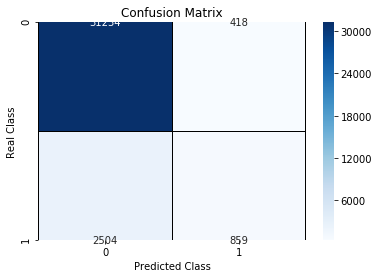

In [266]:
classification_results(y_pred)

**AUC & ROC**

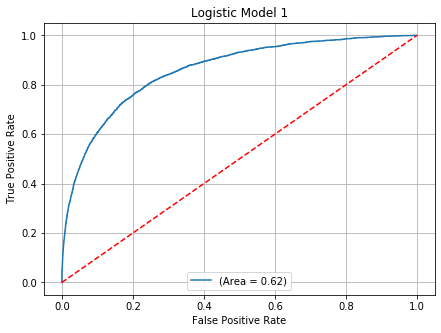

In [267]:
auc_roc(y_pred,y_prob,"Logistic Model 1")

Logistic Regression  : f1=0.370 auc=0.489


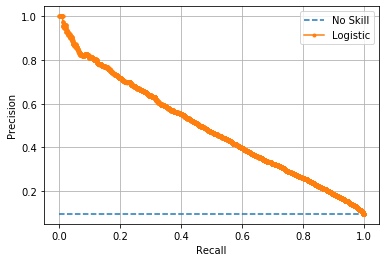

In [269]:
precision_recall(y_pred,y_prob,"Logistic Regression")

## Logistic Regression Model 2

In [70]:
lr_classifier_2 = LogisticRegression(class_weight = 'balanced')
lr_classifier_2.fit(x_train,y_train)

C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [272]:
y_prob = lr_classifier_2.predict_proba(x_test)
y_pred = lr_classifier_2.predict(x_test)

------Confusion Matrix----------
[[24933  6719]
 [  773  2590]]


True Positive:  2590
True Negative:  24933
False Positive:  6719
False Negative:  773


Accuracy Rate:  78.6034556618592
Error Rate:  21.396544338140796


-------------------Classification Report----------------- 

              precision    recall  f1-score   support

           0       0.97      0.79      0.87     31652
           1       0.28      0.77      0.41      3363

    accuracy                           0.79     35015
   macro avg       0.62      0.78      0.64     35015
weighted avg       0.90      0.79      0.83     35015



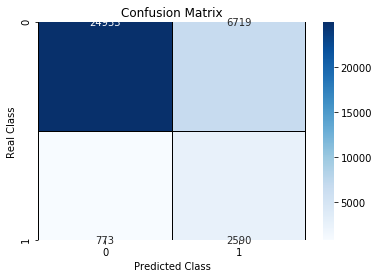

In [273]:
classification_results(y_pred)

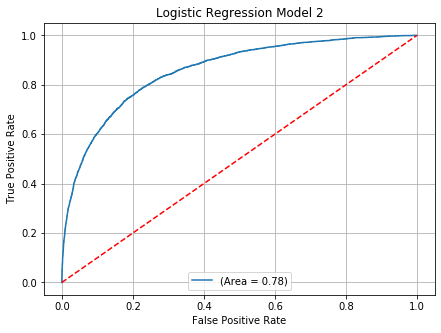

In [274]:
final_roc(y_pred,y_prob,'Logistic Regression Model 2')

Logistic Regression M2  : f1=0.409 auc=0.487


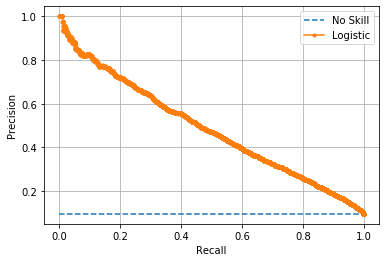

In [275]:
precision_recall(y_pred,y_prob,"Logistic Regression M2")

## Decision Tree Model 1

In [221]:
d_classifier = DecisionTreeClassifier(criterion = 'entropy',class_weight = 'balanced', 
                                  random_state = 2020)
d_classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2020, splitter='best')

In [222]:
y_pred = d_classifier.predict(x_test)
y_prob = d_classifier.predict_proba(x_test)

**Confusion Matrix:**

------Confusion Matrix----------
[[28707  2945]
 [ 2823   540]]


True Positive:  540
True Negative:  28707
False Positive:  2945
False Negative:  2823


Accuracy Rate:  83.52705983150078
Error Rate:  16.472940168499214


-------------------Classification Report----------------- 

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     31652
           1       0.15      0.16      0.16      3363

    accuracy                           0.84     35015
   macro avg       0.53      0.53      0.53     35015
weighted avg       0.84      0.84      0.84     35015



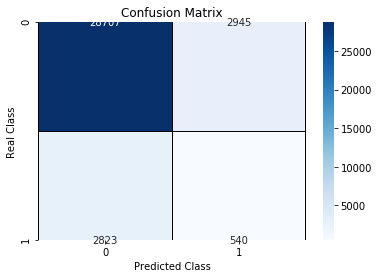

In [223]:
classification_results(y_pred)

**AUC & ROC**

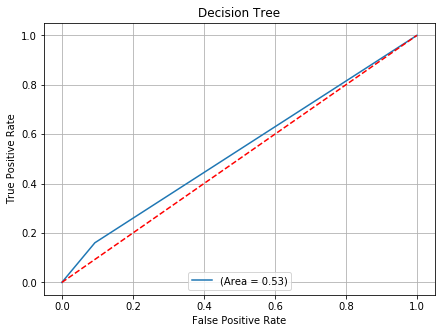

In [224]:
final_roc(y_pred,y_prob,"Decision Tree")

## Decision Tree Model 2 (Max Depth = 7)

In [276]:
d_classifier_2 = DecisionTreeClassifier(criterion = 'entropy',class_weight = 'balanced', 
                                  random_state = 2020,max_depth = 7)
d_classifier_2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2020, splitter='best')

In [277]:
y_prob = d_classifier_2.predict_proba(x_test)
y_pred = d_classifier_2.predict(x_test)

------Confusion Matrix----------
[[23706  7946]
 [ 1812  1551]]


True Positive:  1551
True Negative:  23706
False Positive:  7946
False Negative:  1812


Accuracy Rate:  72.13194345280594
Error Rate:  27.86805654719406


-------------------Classification Report----------------- 

              precision    recall  f1-score   support

           0       0.93      0.75      0.83     31652
           1       0.16      0.46      0.24      3363

    accuracy                           0.72     35015
   macro avg       0.55      0.61      0.54     35015
weighted avg       0.86      0.72      0.77     35015



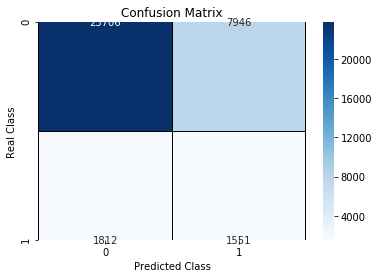

In [278]:
classification_results(y_pred)

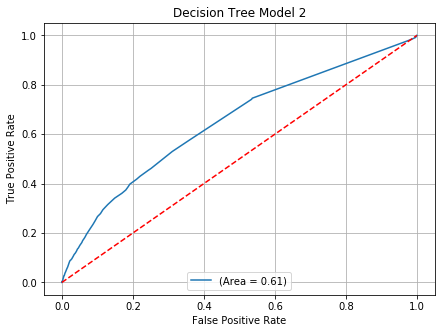

In [279]:
final_roc(y_pred , y_prob , "Decision Tree Model 2")

Decision Tree M2  : f1=0.241 auc=0.175


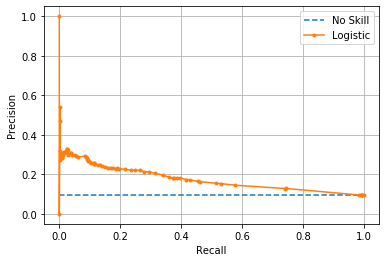

In [280]:
precision_recall(y_pred,y_prob,"Decision Tree M2")

## Random Forest Classifier

In [83]:
rf_classifier = RandomForestClassifier(n_estimators = 10 ,
                                      criterion = 'entropy',
                                      random_state = 2020)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2020,
                       verbose=0, warm_start=False)

In [282]:
y_pred = rf_classifier.predict(x_test)
y_prob = rf_classifier.predict_proba(x_test)

------Confusion Matrix----------
[[31636    16]
 [ 3341    22]]


True Positive:  22
True Negative:  31636
False Positive:  16
False Negative:  3341


Accuracy Rate:  90.41268027988005
Error Rate:  9.587319720119948


-------------------Classification Report----------------- 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     31652
           1       0.58      0.01      0.01      3363

    accuracy                           0.90     35015
   macro avg       0.74      0.50      0.48     35015
weighted avg       0.87      0.90      0.86     35015



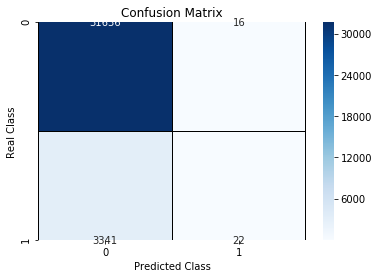

In [283]:
classification_results(y_pred)

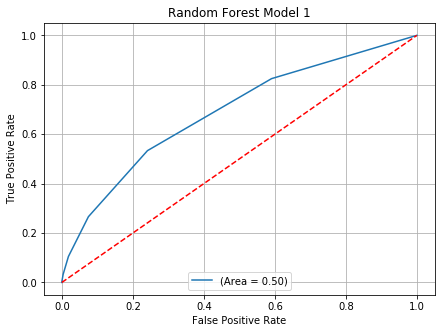

In [284]:
final_roc(y_pred,y_prob,"Random Forest Model 1")

Random Forest  : f1=0.013 auc=0.230


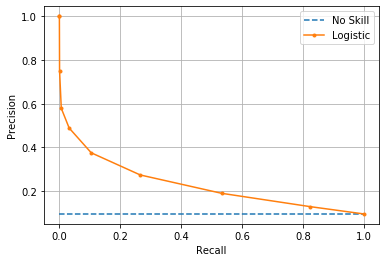

In [285]:
precision_recall(y_pred,y_prob,"Random Forest")

## Naive Bayes Classifier

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
nb_classifier = GaussianNB().fit(x_train,y_train)

In [288]:
y_pred = nb_classifier.predict(x_test)
y_prob = nb_classifier.predict_proba(x_test)

------Confusion Matrix----------
[[31187   465]
 [ 2201  1162]]


True Positive:  1162
True Negative:  31187
False Positive:  465
False Negative:  2201


Accuracy Rate:  92.38612023418536
Error Rate:  7.613879765814651


-------------------Classification Report----------------- 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     31652
           1       0.71      0.35      0.47      3363

    accuracy                           0.92     35015
   macro avg       0.82      0.67      0.71     35015
weighted avg       0.91      0.92      0.91     35015



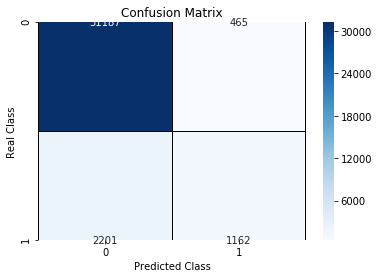

In [289]:
classification_results(y_pred)

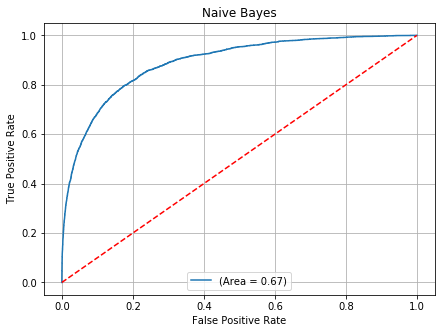

In [290]:
final_roc(y_pred,y_prob,"Naive Bayes")

Naive Bayes  : f1=0.466 auc=0.575


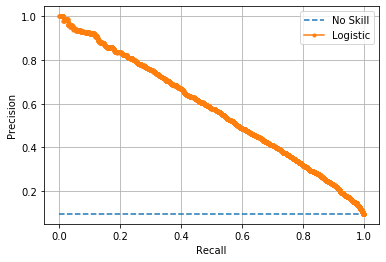

In [291]:
precision_recall(y_pred,y_prob,"Naive Bayes")

## KNN Classifier

In [294]:
KNN = KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train)

In [295]:
y_pred = KNN.predict(x_test)

In [296]:
y_prob = KNN.predict_proba(x_test)

------Confusion Matrix----------
[[31588    64]
 [ 3342    21]]


True Positive:  21
True Negative:  31588
False Positive:  64
False Negative:  3342


Accuracy Rate:  90.27274025417678
Error Rate:  9.727259745823218


-------------------Classification Report----------------- 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     31652
           1       0.25      0.01      0.01      3363

    accuracy                           0.90     35015
   macro avg       0.58      0.50      0.48     35015
weighted avg       0.84      0.90      0.86     35015



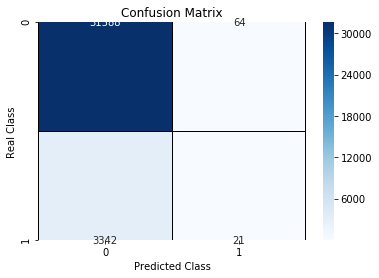

In [297]:
classification_results(y_pred)

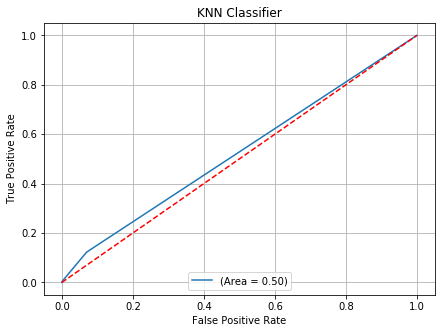

In [298]:
auc_roc(y_pred,y_prob,"KNN Classifier")

KNN Classifier  : f1=0.012 auc=0.136


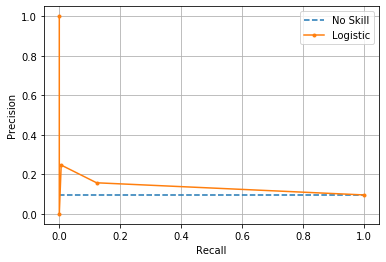

In [299]:
precision_recall(y_pred,y_prob,"KNN Classifier")

In [303]:
x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(df_cleaned.iloc[:,2:203],y,
                                                       test_size = 0.2 , 
                                                       random_state = 2020, stratify = y)

## Predicting results of actual test data

In [36]:
my_test = pd.read_csv('test.csv')

In [37]:
my_test.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [38]:
my_test.describe()

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean        0.277135       7.569407  ...       3.189766       7.458269   
std         3.333375       1.231865  ...       4.551239       3.025189   
min        -9.956000       4.243300  ...     -14.093300      -2.407000   
25%        -2.303900       6.623800  ...      -0.095000       5.166500   
50%         0.372000       7.632000  ...       3.162400       7.379000   
75%         2.930025       8.584825  ...       6.336475       9.531100   
max         9.665500      11.003600  ...      20.359000      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.925944       3.322016      17.996967      -0.133657   
std         1.479966       3.995599       3.140652       1.429678   
min        -3.340900     -11.413100       9.382800      -4.911900   
25%         0.882975       0.587600      15.634775      -1.160700   
50%         1.892600       3.428500      17.977600      -0.162000   
75%         2.956000       6.174200      20.391725       0.837900   
max         8.005000      17.632600      27.947800       4.545400   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.290899       8.912428      15.869184      -3.246342  
std         5.446346       0.920904       3.008717      10.398589  
min       -13.944200       6.169600       6.584000     -39.457800  
25%        -1.948600       8.260075      13.847275     -11.124000  
50%         2.403600       8.892800      15.943400      -2.725950  
75%         6.519800       9.595900      18.045200       4.935400  
max        15.920700      12.275800      26.538400      27.907400  

[8 rows x 200 columns]

In [41]:
my_test_x = my_test.iloc[:,1:201]
my_test_x.head()

var_0    var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493  18.2675   
1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196  18.6316   
2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950  20.2537   
3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397  20.5660   
4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595  10.6048   

    var_8   var_9  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  2.1337  8.8100  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1 -4.4131  5.9739  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  1.5233  8.3442  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  3.3755  7.4578  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  2.9890  7.1437  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 200 columns]

### Use the selected model to predict results

In [84]:
#my_pred = nb_classifier.predict(my_test_x)
my_pred = rf_classifier.predict(my_test_x)

In [85]:
id_test = my_test.iloc[:,0]

In [86]:
final_result = pd.DataFrame(my_pred)
final_result['ID_code'] = id_test
final_result.columns = ['target','ID_code']
final_result = final_result[['ID_code','target']]

In [87]:
final_result.to_csv('submissions.csv',index = False)

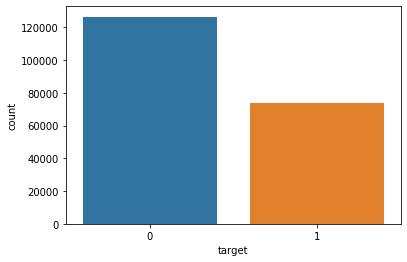

In [88]:
sns.countplot(final_result['target'])